# AlexNet

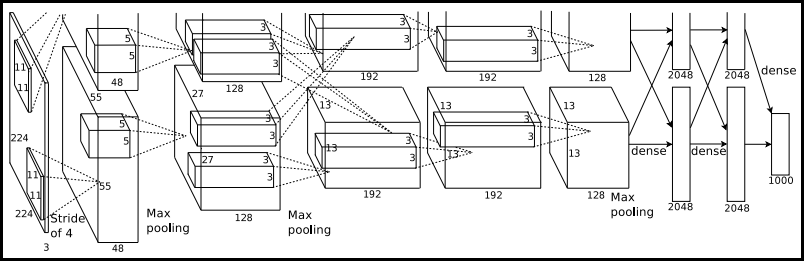

AlexNet은 DCNN 구조를 가지는 모델로 5개의 convolution layer와 3개의 fully-connected layer로 구성되어있음

위 이미지 오타
- 첫 번째 입력 레이어의 입력 이미지가 224 -> 227
- 두 번째 convolution layer에서 kernel size가 3x3 -> 5x5

## 구현 목록

### 레이어 구성 및 종류
- 5 convolution layers, max-pooling layers, 3 fully-connected layers
    - overfitting 해결하기 위해 5개 convolution layer, 3개 fully-connected layer를 사용했다 함
- Dropout
    - overfitting 방지를 위해 fully-connected layer에 적용
    - layer 추가 위치는 1, 2번째 fully-connected layer에 적용
    - 비율: 0.5
- Local Response Normalization
    - 레이어 추가 위치는 1,2 번째 convolution layer 뒤에 적용
    - 적용 배경은 모델의 일반화를 돕는 것을 확인 (top-1, top-2 error율을 각각 1.4%, 1.2% 감소)
- Activation Function
    - ReLU를 모든 convolution layer와 fully-connected에 적용
    - 적용 배경은 아래 그래프처럼 실선인 ReLU가 점선인 tanH보다 빠르게 학습했음
    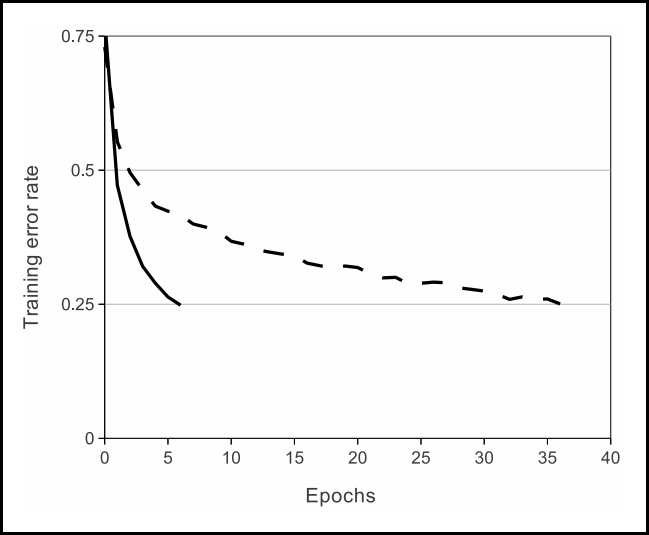

### 하이퍼 파라미터
- optimizer: SGD
- momentum: 0.9
- weight decay: 5e-4
- batch size: 128
- learning rate: 0.01
- adjust learning rate: validation error가 현재 lr로 더 이상 개선 안되면 lr을 10으로 나눠줌. 0.01을 lr 초기 값으로 총 3번 줄어듦
- epoch: 90

In [3]:
import torch
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from torchsummary import summary

In [ ]:
class Alexnet(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, 96, kernel_size = 11, stride = 4),
            torch.nn.ReLU(inplace=True),
            torch.nn.LocalResponseNorm(2),
            torch.nn.MaxPool2d(kerner_size=4, stride=2)
        )

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(96, 256, kernerl_size=5, stride=1, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.LocalResponseNorm(2),
            torch.nn.MaxPool2d(kernal_size=3, stride=2)
        )

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(256,384, kernel_size=4, stride=1, padding=1),
            torch.ReLU(inplace =True)
        )

        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(384, 384, kernel_size = 4, stride = 1, paddind = 1),
            torch.nn.ReLU(inplace = True)
        )

        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(384, 256, kernel_size = 3, strid = 1, padding = 1),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernerl_size = 3, strdie =2)
        )

        self. avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(6*6*256, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096), # fc2
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, num_classes) # fc3
        )

        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.layer3(x)
            x = self.layer4(x)
            x = self.layer5(x)
            x = self.avgpool(x)
            x = torch.flatten(x, 1)
            return self.classifier(x)